In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Final year project/oasis_longitudinal.csv")

In [ ]:
df.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [ ]:
df.shape

(373, 15)

In [ ]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
df.dropna(inplace= True)

In [ ]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit,354.0,1.884181,0.925330,1.000,1.00000,2.0000,2.0000,5.000
MR Delay,354.0,601.353107,640.596081,0.000,0.00000,559.5000,882.5000,2639.000
Age,354.0,77.033898,7.811808,60.000,71.00000,77.0000,82.0000,98.000
EDUC,354.0,14.703390,2.895662,6.000,12.00000,15.0000,16.7500,23.000
SES,354.0,2.460452,1.134005,1.000,2.00000,2.0000,3.0000,5.000
MMSE,354.0,27.409605,3.712626,4.000,27.00000,29.0000,30.0000,30.000
CDR,354.0,0.271186,0.370537,0.000,0.00000,0.0000,0.5000,2.000
eTIV,354.0,1489.991525,175.768462,1106.000,1358.25000,1470.5000,1595.2500,2004.000
nWBV,354.0,0.729879,0.037842,0.644,0.69900,0.7290,0.7570,0.837
ASF,354.0,1.193780,0.136821,0.876,1.10025,1.1935,1.2925,1.587


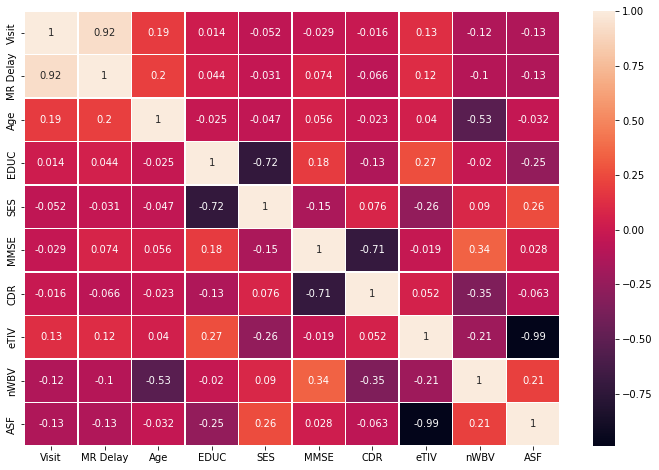

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, linewidths = .5, ax = ax)
plt.show()

In [ ]:
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column

In [ ]:
feature_correlation_matrix = df.corr()
feature_correlation_matrix[abs(feature_correlation_matrix['Group']) > 0.1]['Group']

Group       1.000000
MR Delay   -0.115914
M/F         0.223649
EDUC       -0.163307
MMSE       -0.527441
CDR         0.773560
nWBV       -0.313929
Name: Group, dtype: float64

In [ ]:

from sklearn.model_selection import train_test_split
X = df[['MMSE', 'eTIV', 'nWBV', 'ASF']]
y = df[['Group']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 100,shuffle=True)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", y_test.shape)

X_Train Shape: (283, 4)
Y_Train Shape: (283, 1)
X_Test Shape: (71, 4)
Y_Test Shape: (71, 1)


In [ ]:
#Function for classification report
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, matthews_corrcoef,classification_report 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score

def Test_Classification_Report(model, X_test, y_test):

    scores = []
    metrics = ['F1       ', 'MCC      ', 'Precision', 'Recall   ', 'Accuracy ',
               'AUC_ROC  ', 'AUC_PR   ']

    # Calculate the individual classification metic scores...
    y_pred = model.predict(X_test)
    model_f1_score = f1_score(y_test, y_pred)
    model_matthews_corrcoef_score = matthews_corrcoef(y_test, y_pred)
    model_precision_score = precision_score(y_test, y_pred)
    model_recall_score = recall_score(y_test, y_pred)
    model_accuracy_score = accuracy_score(y_test, y_pred)

    scores.append([(model_f1_score),
                (model_matthews_corrcoef_score),
                (model_precision_score),
                (model_recall_score),
                (model_accuracy_score)])

    results = pd.DataFrame(columns = ['Classification Metric', 'Score Value'])
    for i in range(len(scores[0])):
        results.loc[i] = [metrics[i], scores[0][i]]

    results.index = np.arange(1, len(results) + 1)

    class_report = classification_report(y_test, y_pred)
    print('Classification Report:\n    ',class_report,'\n')
    print('********************************************************')
    print('Results:\n   ',results,'\n')
    print('********************************************************')

In [ ]:
def feature_importances(model):
    fig = plt.figure()
    
    # get the feature importance of the classifier 'model'
    feature_importances = pd.Series(model.feature_importances_,
                            index = X_train.columns) \
                    .sort_values(ascending=False)
    
    # plot the bar chart
    sns.barplot(x = feature_importances, y = X_train.columns)
    plt.title('Feature Importance plot', fontdict = {'fontsize' : 15})
    plt.xticks(rotation = 60)
    plt.show()

Gradient Booster Classifier accuracy : 77.46%


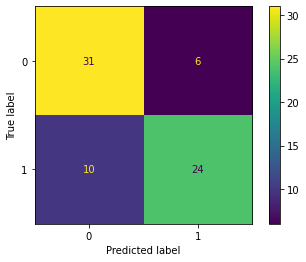

Classification Report:
                   precision    recall  f1-score   support

           0       0.76      0.84      0.79        37
           1       0.80      0.71      0.75        34

    accuracy                           0.77        71
   macro avg       0.78      0.77      0.77        71
weighted avg       0.78      0.77      0.77        71
 

********************************************************
Results:
      Classification Metric  Score Value
1             F1            0.750000
2             MCC           0.549874
3             Precision     0.800000
4             Recall        0.705882
5             Accuracy      0.774648 

********************************************************


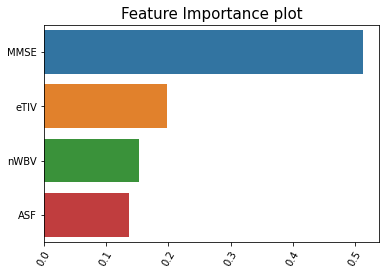

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predict_GBC=GBC.predict(X_test)
accuracy_score_GBC=accuracy_score(y_test,predict_GBC)
print("Gradient Booster Classifier accuracy :", "{:.2f}%".format(100*accuracy_score_GBC))
plot_confusion_matrix(GBC, X_test, y_test,cmap=plt.cm.viridis)
plt.show()
Test_Classification_Report(GBC, X_test, y_test)
feature_importances(GBC)

Decision Tree Classifier accuracy  : 78.87%


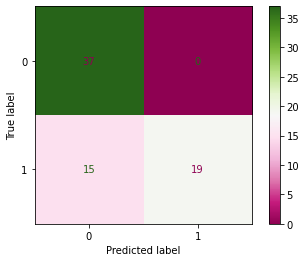

Classification Report:
                   precision    recall  f1-score   support

           0       0.71      1.00      0.83        37
           1       1.00      0.56      0.72        34

    accuracy                           0.79        71
   macro avg       0.86      0.78      0.77        71
weighted avg       0.85      0.79      0.78        71
 

********************************************************
Results:
      Classification Metric  Score Value
1             F1            0.716981
2             MCC           0.630575
3             Precision     1.000000
4             Recall        0.558824
5             Accuracy      0.788732 

********************************************************


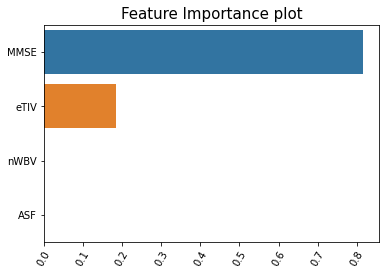

In [ ]:
from sklearn.tree import DecisionTreeClassifier
D_Tree = DecisionTreeClassifier(max_depth=2, class_weight='balanced',
                                       criterion='entropy', random_state=100)
D_Tree.fit(X_train,y_train)
predict_D_Tree=D_Tree.predict(X_test)
accuracy_score_D_Tree=accuracy_score(y_test,predict_D_Tree)
print("Decision Tree Classifier accuracy  :", "{:.2f}%".format(100*accuracy_score_D_Tree))
plot_confusion_matrix(D_Tree, X_test, y_test,cmap=plt.cm.PiYG)
plt.show()
Test_Classification_Report(D_Tree, X_test, y_test)
feature_importances(D_Tree)

Decision Tree Bagging Classifier accuracy  : 76.06%


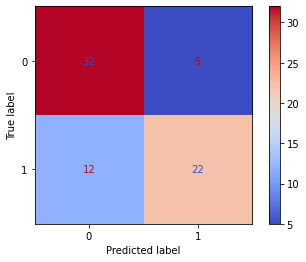

Classification Report:
                   precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.81      0.65      0.72        34

    accuracy                           0.76        71
   macro avg       0.77      0.76      0.76        71
weighted avg       0.77      0.76      0.76        71
 

********************************************************
Results:
      Classification Metric  Score Value
1             F1            0.721311
2             MCC           0.526790
3             Precision     0.814815
4             Recall        0.647059
5             Accuracy      0.760563 

********************************************************


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
Bagging_D_Tree = DecisionTreeClassifier(max_depth=2, class_weight='balanced',
                                       criterion='entropy', random_state=100)

DTB_clf = BaggingClassifier(base_estimator=Bagging_D_Tree,
                                max_samples=0.745, n_estimators=100,
                                max_features=0.37,
                                n_jobs=-1, random_state=100)
DTB_clf.fit(X_train,y_train)
predict_DTB_clf=DTB_clf.predict(X_test)
accuracy_score_DTB_clf=accuracy_score(y_test,predict_DTB_clf)
print("Decision Tree Bagging Classifier accuracy  :", "{:.2f}%".format(100*accuracy_score_DTB_clf))
plot_confusion_matrix(DTB_clf, X_test, y_test,cmap=plt.cm.coolwarm)
plt.show()
Test_Classification_Report(DTB_clf, X_test, y_test)

Logistic Regression accuracy  : 83.10%


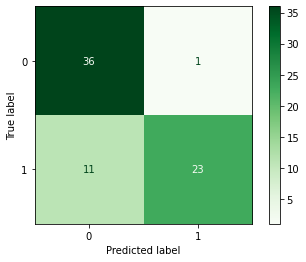

Classification Report:
                   precision    recall  f1-score   support

           0       0.77      0.97      0.86        37
           1       0.96      0.68      0.79        34

    accuracy                           0.83        71
   macro avg       0.86      0.82      0.83        71
weighted avg       0.86      0.83      0.83        71
 

********************************************************
Results:
      Classification Metric  Score Value
1             F1            0.793103
2             MCC           0.685847
3             Precision     0.958333
4             Recall        0.676471
5             Accuracy      0.830986 

********************************************************


In [ ]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression(max_iter=100)
LR.fit(X_train,y_train)
predict_LR=LR.predict(X_test)
accuracy_score_LR=accuracy_score(y_test,predict_LR)
print("Logistic Regression accuracy  :", "{:.2f}%".format(100*accuracy_score_LR))
plot_confusion_matrix(LR, X_test, y_test,cmap=plt.cm.Greens)
plt.show()
Test_Classification_Report(LR, X_test, y_test)


Since out of all the algorithms Logistic Regression has the best accuracy we are saving the logistic regression model for prediction.

In [ ]:
print(y_test)
testing=pd.DataFrame(data=y_test, columns=['y_test'])
testing
predict_LR


     Group
211      0
174      1
62       0
192      0
199      0
..     ...
66       0
124      1
102      0
37       1
345      1

[71 rows x 1 columns]


array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1])

In [ ]:
import joblib
joblib.dump(LR,"Logistic_model.pkl") 

['Logistic_model.pkl']

In [ ]:
import os
os.listdir()
!ls

drive  Logistic_model.pkl  sample_data


In [ ]:
prediction=LR.predict([[27,1106.0,0.69,1.29]])

In [ ]:
print(str(prediction))
model_prediction = int(prediction)
model_prediction

[1]


1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
 
knn=knn.fit(X_train.values, y_train.values.ravel())

Test_Classification_Report(knn, X_test, y_test)

Classification Report:
                   precision    recall  f1-score   support

           0       0.71      0.73      0.72        37
           1       0.70      0.68      0.69        34

    accuracy                           0.70        71
   macro avg       0.70      0.70      0.70        71
weighted avg       0.70      0.70      0.70        71
 

********************************************************
Results:
      Classification Metric  Score Value
1             F1            0.686567
2             MCC           0.406848
3             Precision     0.696970
4             Recall        0.676471
5             Accuracy      0.704225 

********************************************************


In [ ]:
#Import svm Linear model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', probability=True) # Linear Kernel

#Train the model using the training sets
clf=clf.fit(X_train.values, y_train.values.ravel())
Test_Classification_Report(clf, X_test, y_test)
plt.show()

Classification Report:
                   precision    recall  f1-score   support

           0       0.73      0.97      0.84        37
           1       0.95      0.62      0.75        34

    accuracy                           0.80        71
   macro avg       0.84      0.80      0.79        71
weighted avg       0.84      0.80      0.80        71
 

********************************************************
Results:
      Classification Metric  Score Value
1             F1            0.750000
2             MCC           0.638027
3             Precision     0.954545
4             Recall        0.617647
5             Accuracy      0.802817 

********************************************************


In [ ]:
#Import svm Radial model
from sklearn import svm

#Create a svm Classifier
clf_rad = svm.SVC(kernel='rbf', probability=True) # RBF (radial basis function)

#Train the model using the training sets
clf_rad=clf_rad.fit(X_train.values, y_train.values.ravel())
Test_Classification_Report(clf_rad, X_test, y_test)

Classification Report:
                   precision    recall  f1-score   support

           0       0.52      1.00      0.69        37
           1       0.00      0.00      0.00        34

    accuracy                           0.52        71
   macro avg       0.26      0.50      0.34        71
weighted avg       0.27      0.52      0.36        71
 

********************************************************
Results:
      Classification Metric  Score Value
1             F1            0.000000
2             MCC           0.000000
3             Precision     0.000000
4             Recall        0.000000
5             Accuracy      0.521127 

********************************************************


In [ ]:
from sklearn.naive_bayes import GaussianNB 
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train.values.ravel())
# Generate the model test classification report
Test_Classification_Report(nb_clf, X_test, y_test)

Classification Report:
                   precision    recall  f1-score   support

           0       0.72      0.97      0.83        37
           1       0.95      0.59      0.73        34

    accuracy                           0.79        71
   macro avg       0.84      0.78      0.78        71
weighted avg       0.83      0.79      0.78        71
 

********************************************************
Results:
      Classification Metric  Score Value
1             F1            0.727273
2             MCC           0.614285
3             Precision     0.952381
4             Recall        0.588235
5             Accuracy      0.788732 

********************************************************


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
adb_clf.fit(X_train, y_train.values.ravel())
Test_Classification_Report(adb_clf, X_test, y_test)

Classification Report:
                   precision    recall  f1-score   support

           0       0.77      0.89      0.82        37
           1       0.86      0.71      0.77        34

    accuracy                           0.80        71
   macro avg       0.81      0.80      0.80        71
weighted avg       0.81      0.80      0.80        71
 

********************************************************
Results:
      Classification Metric  Score Value
1             F1            0.774194
2             MCC           0.611032
3             Precision     0.857143
4             Recall        0.705882
5             Accuracy      0.802817 

********************************************************


Random Forest Classifier accuracy  : 76.06%


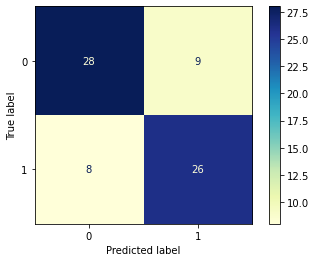

Classification Report:
                   precision    recall  f1-score   support

           0       0.78      0.76      0.77        37
           1       0.74      0.76      0.75        34

    accuracy                           0.76        71
   macro avg       0.76      0.76      0.76        71
weighted avg       0.76      0.76      0.76        71
 

********************************************************
Results:
      Classification Metric  Score Value
1             F1            0.753623
2             MCC           0.521049
3             Precision     0.742857
4             Recall        0.764706
5             Accuracy      0.760563 

********************************************************


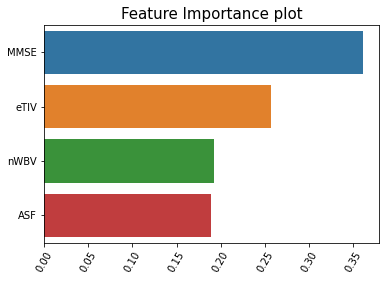

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predict_RFC=RFC.predict(X_test)
accuracy_score_RFC=accuracy_score(y_test,predict_RFC)
print("Random Forest Classifier accuracy  :", "{:.2f}%".format(100*accuracy_score_RFC))
plot_confusion_matrix(RFC, X_test, y_test,cmap=plt.cm.YlGnBu)
plt.show()
Test_Classification_Report(RFC, X_test, y_test)
feature_importances(RFC)

Bagging Classifier accuracy  : 78.87%


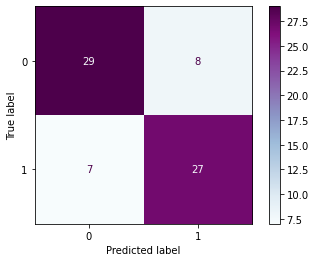

Classification Report:
                   precision    recall  f1-score   support

           0       0.81      0.78      0.79        37
           1       0.77      0.79      0.78        34

    accuracy                           0.79        71
   macro avg       0.79      0.79      0.79        71
weighted avg       0.79      0.79      0.79        71
 

********************************************************
Results:
      Classification Metric  Score Value
1             F1            0.782609
2             MCC           0.577443
3             Precision     0.771429
4             Recall        0.794118
5             Accuracy      0.788732 

********************************************************


In [ ]:
from sklearn.ensemble import BaggingClassifier
BagC=BaggingClassifier()
BagC.fit(X_train,y_train)
predict_BagC=BagC.predict(X_test)
accuracy_score_BagC=accuracy_score(y_test,predict_BagC)
print("Bagging Classifier accuracy  :", "{:.2f}%".format(100*accuracy_score_BagC))
plot_confusion_matrix(BagC, X_test, y_test,cmap=plt.cm.BuPu)
plt.show()
Test_Classification_Report(BagC, X_test, y_test)

 Extreme Gradient Boost accuracy  : 78.87%


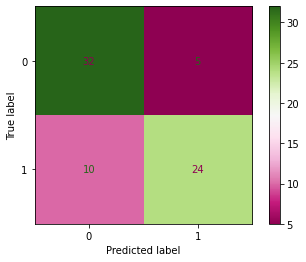

Classification Report:
                   precision    recall  f1-score   support

           0       0.76      0.86      0.81        37
           1       0.83      0.71      0.76        34

    accuracy                           0.79        71
   macro avg       0.79      0.79      0.79        71
weighted avg       0.79      0.79      0.79        71
 

********************************************************
Results:
      Classification Metric  Score Value
1             F1            0.761905
2             MCC           0.580043
3             Precision     0.827586
4             Recall        0.705882
5             Accuracy      0.788732 

********************************************************


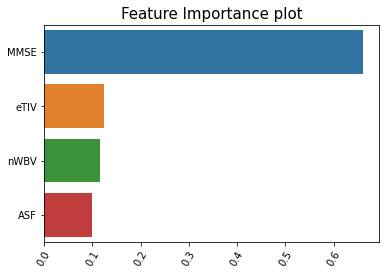

In [ ]:
# XGBoost -Extreme Gradient Boost
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(X_train,y_train)
predict_XGB=XGB.predict(X_test)
accuracy_score_XGB=accuracy_score(y_test,predict_XGB)
print(" Extreme Gradient Boost accuracy  :", "{:.2f}%".format(100*accuracy_score_XGB))
plot_confusion_matrix(XGB, X_test, y_test,cmap=plt.cm.PiYG)
plt.show()
Test_Classification_Report(XGB, X_test, y_test)
feature_importances(XGB)

In [ ]:
lst_acc=[accuracy_score_LR,accuracy_score_RFC,accuracy_score_D_Tree,accuracy_score_DTB_clf,accuracy_score_BagC,accuracy_score_XGB,accuracy_score_GBC,0.802817,0.788732,0.521127,0.802817,0.704225,0.5910, ]
acc_lable=['Logistic Regression Accuracy','Random Forest','Decision Tree','Decision Tree with Bagging',
        ' Bagging Classifier Accuracy','XGBoost','Gradient Boosting','AdaBoostClassifier','GaussianNB','SVM Radial','SVM Linear','KNN','Linear Regression',]

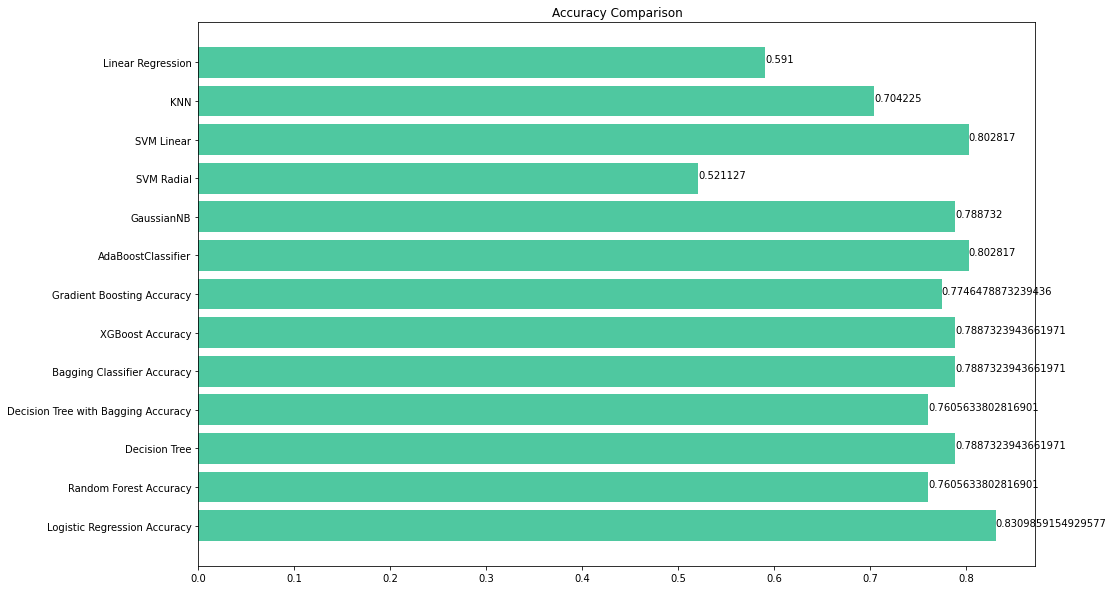

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(acc_lable,lst_acc,color ='#4FC8A0')
plt.title('Accuracy Comparison')
for index, value in enumerate(lst_acc):
    plt.text(value, index, str(value))
plt.show()